In [23]:
import urllib.request as ur
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import extractStocks as es

In [2]:
es.showComp()

Apple Inc: AAPL
Exxon Mobil Corp: XOM
Coca-Cola Co: KO
Intel Corp: INTC
Walmart Inc: WMT
Microsoft Corp: MSFT
International Business Machines Corp: IBM
Chevron Corp: CVX
Johnson & Johnson: JNJ
Walt Disney Co, The: DIS
Procter & Gamble Co: PG
Pfizer Inc: PFE
Verizon Communications Inc: VZ
Boeing Co: BA
Merck & Co Inc: MRK
Cisco Systems Inc: CSCO
Home Depot Inc: HD
McDonald's Corp: MCD
3M Co: MMM
General Electric Co: GE
United Technologies Corp: UTX
Nike Inc: NKE
Caterpillar Inc: CAT
Visa Inc: V
JPMorgan Chase & Co: JPM
American Express Co: AXP
Goldman Sachs Group Inc: GS
UnitedHealth Group Inc: UNH
Travelers Companies Inc: TRV
DowDuPont Inc: DWDP


In [3]:
stck=input("Enter the Stock Symbol you want: (e.g. 'MSFT','AAPL'): ")
strtd=input("Enter the start date of the data (YYYY-MM-DD)")

Enter the Stock Symbol you want: (e.g. 'MSFT','AAPL'): MCD
Enter the start date of the data (YYYY-MM-DD)2012-01-01


In [5]:
es.stocksData(stck,strtd)

In [6]:
df=pd.read_csv('teststocks.csv')

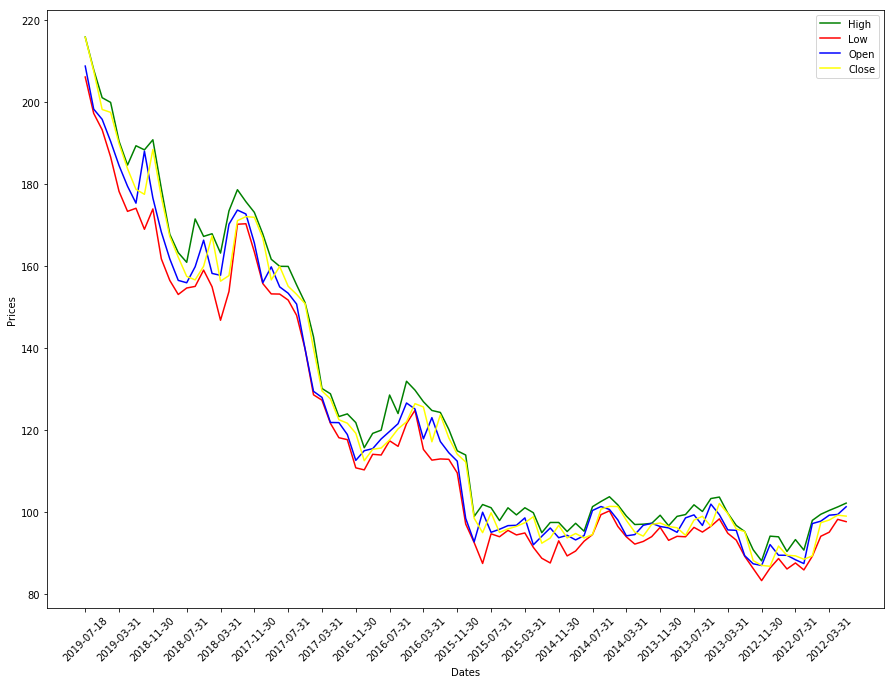

In [7]:
plt.figure(figsize=(15,11))
plt.plot(df['High'],color='green',label='High')
plt.plot(df['Low'],color='red',label='Low')
plt.plot(df['Open'],color='blue',label='Open')
plt.plot(df['Close'],color='yellow',label='Close')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,df.shape[0],4), df['Date'].loc[::4], rotation=45)
plt.legend()

In [8]:
x=df['Open']
y=df['Close']

In [9]:
xm=np.mean(x)
ym=np.mean(y)

In [10]:
sumx=[]
sumy=[]
for i in x:
    sumx.append(xm-i)

for i in y:
    sumy.append(ym-i)

In [11]:
m=0
temp=[]
for i in range(len(y)):
    m+=sumy[i]*sumx[i]
    temp.append(sumx[i]**2)
t=sum(temp)

In [12]:
slope=m/t
c=ym-slope*xm
slope,c

(1.028855997568027, -2.1718883731307557)

In [13]:
def pred(slope,x,intercept):
    return slope*x+intercept

In [15]:
yp=[]
for i in x:
    yp.append(pred(slope,i,c))

In [20]:
mse(yp,y),np.sqrt(mse(yp,y))

(22.276115433927867, 4.71975798467759)

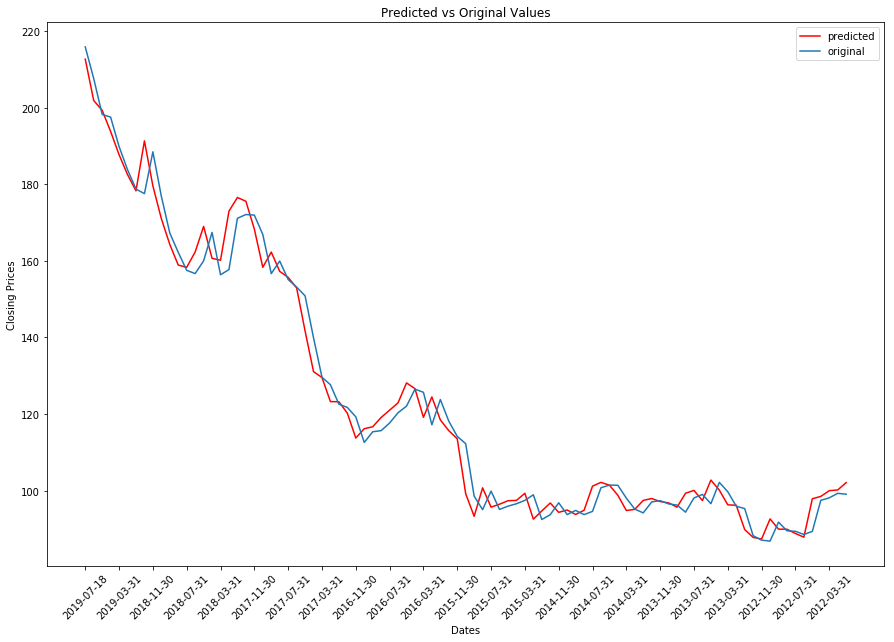

In [22]:
plt.figure(figsize=(15,10))
plt.plot(yp,label='predicted',color='red')
plt.plot(y,label="original")
plt.title('Predicted vs Original Values')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.xticks(np.arange(0,df.shape[0],4), df['Date'].loc[::4], rotation=45)
plt.legend()

In [19]:
df['Pred Close']=yp
df

,Date,Open,Close,High,Low,Pred Close
0,2019-07-18,208.86,215.91,215.9500,206.1900,212.714975
1,2019-06-30,198.36,207.66,207.9900,197.3200,201.911987
2,2019-05-31,195.87,198.27,201.1462,193.3200,199.350136
3,2019-04-30,190.50,197.57,200.0000,186.7000,193.825179
4,2019-03-31,184.59,189.90,190.5200,178.2700,187.744640
5,2019-02-28,179.55,183.84,184.7050,173.4100,182.559206
6,2019-01-31,175.41,178.78,189.4200,174.1680,178.299742
7,2018-12-31,188.10,177.57,188.4200,169.0400,191.355925
8,2018-11-30,176.67,188.51,190.8800,174.0000,179.596101
9,2018-10-31,168.37,176.90,178.9600,161.8200,171.056596
